In [35]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import imutils
import cv2

from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import shutil
import glob
def detect_plate1(img):
    flag=0
    if type(img)==str:
        img_list= glob.glob(img)
    else:
        gray_car_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        threshold_value = threshold_otsu(gray_car_image)
        binary_car_image = gray_car_image > threshold_value
        print(binary_car_image.shape)
#       s= cv2.cvtColor(binary_car_image, cv2.COLOR_RGB2BGR)
#         plt.imshow(binary_car_image, cmap='gray')
#         plt.show()
        # CCA (finding connected regions) of binary image
        # this gets all the connected regions and groups them together
        label_image = measure.label(binary_car_image)
        plate_dimensions2 = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
        min_height, max_height, min_width, max_width = plate_dimensions2
        plate_objects_cordinates = []
        plate_like_objects = []
        fig, (ax1) = plt.subplots(1)
        ax1.imshow(gray_car_image, cmap="gray")
        for region in regionprops(label_image):
            # print(region)
            if region.area < 50:
                #if the region is so small then it's likely not a license plate
                continue
                # the bounding box coordinates
            min_row, min_col, max_row, max_col = region.bbox
#             print(min_row)
#             print(min_col)
#             print(max_row)
#             print(max_col)

            region_height = max_row - min_row
            region_width = max_col - min_col
            # print(region_height)
            # print(region_width)

            # ensuring that the region identified satisfies the condition of a typical license plate
            if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
                flag = 1
                plate_like_objects.append(binary_car_image[min_row:max_row,
                                          min_col:max_col])
                plate_objects_cordinates.append((min_row, min_col,
                                                 max_row, max_col))
                rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                               linewidth=2, fill=False)
                ax1.add_patch(rectBorder)
                # let's draw a red rectangle over those regions
            for z,coor in enumerate(plate_objects_cordinates):
                img1=img[coor[0]:coor[2],coor[1]:coor[3]]
                cv2.imwrite(f'/Users/datle/Desktop/plate_v4/result_plate/result_{z}.png', img=img1)
        plt.show()

(239, 311)


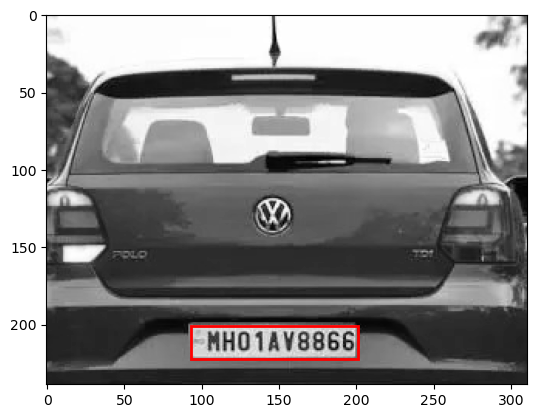

In [36]:
img= cv2.imread("/Users/datle/Desktop/plate_v4/img_car/0_0.png", cv2.IMREAD_COLOR)
detect_plate1(img)

In [3]:
!pwd

/Users/datle/Desktop/plate_v4/plate_detect
